# Task 1: Import Modules

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
np.random.seed(0) 
plt.style.use("ggplot") 
import tensorflow as tf 
print('Tensorflow version:', tf.__version__) 
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.4.1
GPU detected: []


# Task 2: Load and Explore the NER Dataset
geo = Geographical Entity
org = Organization
per = Person
gpe = Geopolitical Entity
tim = Time indicator
art = Artifact
eve = Event
nat = Natural Phenomenon

In [3]:
data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data = data.fillna(method="ffill")
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [4]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 35178
Unique tags in corpus: 17


In [ ]:
"""
Now, here we are going to create a list and use the set method to get de-duplicated values within the “word” column. And we’ll append the corresponding padding named “Endpad”.
"""

In [13]:
words = list(set(data["Word"].values))
print(words)
words.append("ENDPAD")
num_words = len(words)

['identified', 'outing', 'spokesmen', 'Having', 'N.R.C.', 'winner', 'Koizumi', 'worshippers', 'Coahuila', 'Laboratories', 'Embassy', 'dislodge', 'wiretaps', 'extinguished', 'toy', '7.9', 'non-energy', 'jazz', 'isolation', 'where', 'Nasr', 'beans', 'Stethem', 'CPSC', 'hoping', 'Galina', 'Reservist', 'MOI', 'Casmir', 'OF', 'Nabucco', 'Banaue', 'unvarnished', 'tendon', 'Allen', 'S.p.A.', 'Laith', 'Haris', 'Somchai', 'enshrine', 'super-giant', 'receive', 'liberate', 'Timessays', 'lodged', 'Drawing', 'Indianapolis', 'Bot', 'Alex', 'Mahabad', 'logistical', '25-nation', 'creditor', 'presumed', 'practically', 'intermediate', '28.9', 'Mujahadeen', 'Messenger', 'ambushed', 'Guyana', 'finisher', 'fling', 'Southeast', 'tube', 'Greek-owned', 'attributing', 'handled', 'KABILA', 'breakaway', 'Goushmane', 'disobey', '73', 'Centurion', 'center-right', 'Ticketing', 'U.N.-Afghan', 'lash', 'Pillay', 'provisionally', 'Herrington', 'Zaragoza', 'looser', 'Wangari', 'Beni', 'T-shirts', 'Estrada', 'Congression

In [ ]:
"""
tags = list(set(data["Tag"].values))
num_tags = len(tags)
print(num_words, num_tags)
"""

In [14]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)
print(num_words, num_tags)

35179 17


# Task 3: Retrieve Sentences and Corresponding Tags

In [16]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [17]:
getter = SentenceGetter(data) 
sentences = getter.sentences
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

# Task 4: Define Mappings between Sentences and Tags

In [18]:
word2idx = {w: i + 1 for i, w in enumerate(words)} 
tag2idx = {t: i for i, t in enumerate(tags)}
word2idx

{'identified': 1,
 'outing': 2,
 'spokesmen': 3,
 'Having': 4,
 'N.R.C.': 5,
 'winner': 6,
 'Koizumi': 7,
 'worshippers': 8,
 'Coahuila': 9,
 'Laboratories': 10,
 'Embassy': 11,
 'dislodge': 12,
 'wiretaps': 13,
 'extinguished': 14,
 'toy': 15,
 '7.9': 16,
 'non-energy': 17,
 'jazz': 18,
 'isolation': 19,
 'where': 20,
 'Nasr': 21,
 'beans': 22,
 'Stethem': 23,
 'CPSC': 24,
 'hoping': 25,
 'Galina': 26,
 'Reservist': 27,
 'MOI': 28,
 'Casmir': 29,
 'OF': 30,
 'Nabucco': 31,
 'Banaue': 32,
 'unvarnished': 33,
 'tendon': 34,
 'Allen': 35,
 'S.p.A.': 36,
 'Laith': 37,
 'Haris': 38,
 'Somchai': 39,
 'enshrine': 40,
 'super-giant': 41,
 'receive': 42,
 'liberate': 43,
 'Timessays': 44,
 'lodged': 45,
 'Drawing': 46,
 'Indianapolis': 47,
 'Bot': 48,
 'Alex': 49,
 'Mahabad': 50,
 'logistical': 51,
 '25-nation': 52,
 'creditor': 53,
 'presumed': 54,
 'practically': 55,
 'intermediate': 56,
 '28.9': 57,
 'Mujahadeen': 58,
 'Messenger': 59,
 'ambushed': 60,
 'Guyana': 61,
 'finisher': 62,
 'flin

# Task 5: Padding Input Sentences and Creating Train/Test Splits

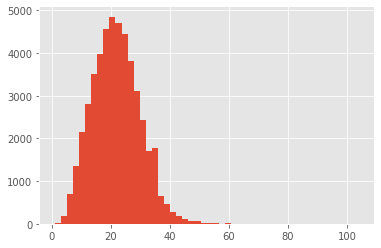

In [19]:
plt.hist([len(s) for s in sentences], bins=50) 
plt.show()

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 50
X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)
y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [21]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
from tensorflow.keras import Model, Input 
from tensorflow.keras.layers import LSTM, Embedding, Dense 
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [26]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 200)           120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Task 7: Train the Model

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 
from livelossplot.tf_keras import PlotLossesCallback

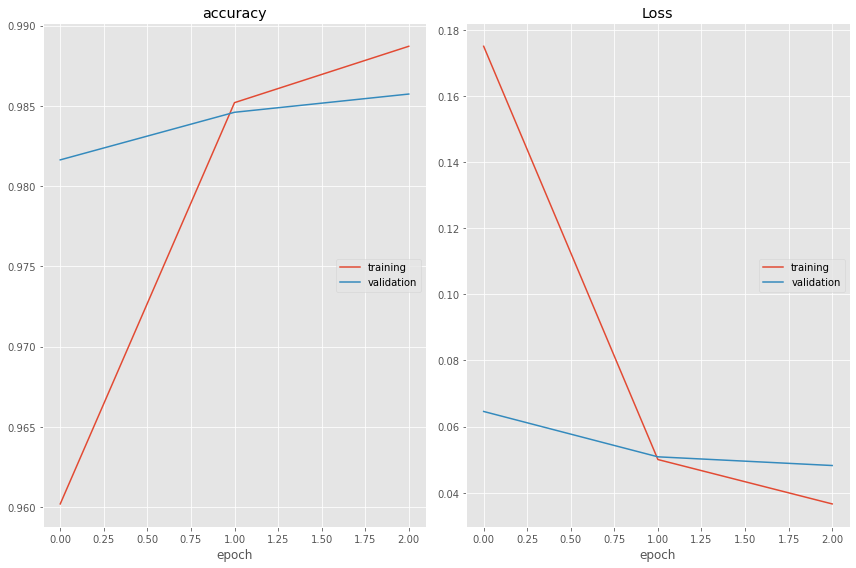

accuracy
	training         	 (min:    0.960, max:    0.989, cur:    0.989)
	validation       	 (min:    0.982, max:    0.986, cur:    0.986)
Loss
	training         	 (min:    0.037, max:    0.175, cur:    0.037)
	validation       	 (min:    0.048, max:    0.065, cur:    0.048)

Epoch 00003: val_loss improved from 0.05086 to 0.04823, saving model to model_weights.h5
Wall time: 8min 15s


In [33]:
%%time
chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=0, mode='max', baseline=None, restore_best_weights=False)
callbacks = [PlotLossesCallback(), chkpt, early_stopping]
history = model.fit(
    x=x_train,y=y_train,
    validation_data=(x_test,y_test),
    batch_size=32,
    epochs=3,
    callbacks=callbacks,
    verbose=1)

# Task 8: Evaluate Named Entity Recognition Model

In [34]:
model.evaluate(x_test, y_test)

300/300 [==============================] - 5s 17ms/step - loss: 0.0482 - accuracy: 0.9857

[0.04823310300707817, 0.985731840133667]

In [35]:
i = np.random.randint(0, x_test.shape[0]) #659
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

Word           True 	 Pred

------------------------------
The            O	O
United         B-org	B-org
Nations        I-org	I-org
has            O	O
been           O	O
under          O	O
fire           O	O
for            O	O
failing        O	O
to             O	O
stop           O	O
ongoing        O	O
ethnic         O	O
violence       O	O
in             O	O
Ituri          B-geo	B-geo
.              O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
programming    O	O
progr